In [1]:
import numpy
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
import  pandas as pd
import  os
from keras.models import Sequential, load_model
from sklearn.preprocessing import MinMaxScaler
import tensorboard
# dataframe = pd.read_excel('/Users/kuzaowuwei/Desktop/2022美赛/赛中数据/1预测模型/data/price_cleaned.xlsx')
# dataset_bitcoin = dataframe['value'].values[:,1].reshape(-1,1)
# dataset_gold = dataframe['usdpm'].values[:,1].reshape(-1,1)
dataframe = pd.read_excel('/Users/kuzaowuwei/Desktop/2022美赛/赛中数据/1预测模型/data/price_cleaned.xlsx')
dataset_bitcoin = dataframe['value'].values.reshape(-1,1)
dataset_gold = dataframe['usdpm'].values.reshape(-1,1)
dataset = dataset_gold.copy()
dataset = dataset_bitcoin.copy()
# print(dataset)
# 将整型变为float
dataset = dataset.astype('float32')
# 归一化数据
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)
# 划分训练集和测试集
train_size = int(len(dataset) * 0.70)
trainlist = dataset[:train_size]
testlist = dataset[train_size:]
# 创建数据集
def create_dataset(dataset, look_back):
#这里的look_back与timestep相同
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back)]
        dataX.append(a)
        dataY.append(dataset[i + look_back])
    return numpy.array(dataX),numpy.array(dataY)
#训练数据太少 look_back并不能过大
look_back = 1
trainX,trainY  = create_dataset(trainlist,look_back)
testX,testY = create_dataset(testlist,look_back)
trainX = numpy.reshape(trainX, (trainX.shape[0], trainX.shape[1], 1))
testX = numpy.reshape(testX, (testX.shape[0], testX.shape[1] ,1 ))



2022-02-19 15:24:00.527299: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Epoch 1/10
1276/1276 - 2s - loss: 0.0019 - 2s/epoch - 2ms/step
Epoch 2/10
1276/1276 - 1s - loss: 9.0600e-05 - 1s/epoch - 928us/step
Epoch 3/10
1276/1276 - 1s - loss: 3.6179e-05 - 1s/epoch - 859us/step
Epoch 4/10
1276/1276 - 1s - loss: 3.7053e-05 - 1s/epoch - 878us/step
Epoch 5/10
1276/1276 - 1s - loss: 3.7535e-05 - 1s/epoch - 898us/step
Epoch 6/10
1276/1276 - 1s - loss: 3.8046e-05 - 1s/epoch - 835us/step
Epoch 7/10
1276/1276 - 1s - loss: 3.8994e-05 - 1s/epoch - 869us/step
Epoch 8/10
1276/1276 - 1s - loss: 3.6596e-05 - 1s/epoch - 869us/step
Epoch 9/10
1276/1276 - 1s - loss: 3.7819e-05 - 1s/epoch - 904us/step
Epoch 10/10
1276/1276 - 1s - loss: 3.9325e-05 - 1s/epoch - 998us/step
loss function: mse
1276/1276 - 1s - loss: 3.1348e-05 - 1s/epoch - 954us/step
546/546 - 0s - loss: 4.9150e-04 - 367ms/epoch - 673us/step
train loss:	 3.134809958282858e-05
test loss:	 0.0004914986784569919


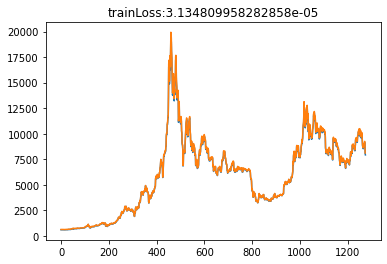

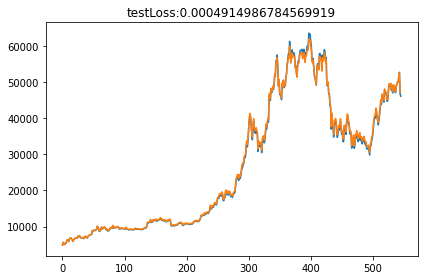

In [2]:


# create and fit the LSTM network
model = Sequential()
model.add(LSTM(4, input_shape=(None,1)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=10, batch_size=1, verbose=2)
model.save(os.path.join("DATA","LSTM_BITCOIN" + ".h5"))
# make predictions
#model = load_model(os.path.join("DATA","Test" + ".h5"))
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
 
# 评估
print('loss function: mse')
train_loss = model.evaluate(trainX,trainY,batch_size=1, verbose=2)
test_loss=  model.evaluate(testX,testY,batch_size=1, verbose=2)
print('train loss:\t', train_loss)
print('test loss:\t', test_loss)



#反归一化
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform(trainY)
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform(testY)

# 画画
# plt.subplot(1,2,1)
plt.plot(trainY)
plt.plot(trainPredict[1:])
plt.title('trainLoss:'+str(train_loss))
plt.show()
# plt.subplot(1,2,2)
plt.plot(testY)
plt.plot(testPredict[1:])
plt.title('testLoss:'+str(test_loss))
plt.tight_layout()
plt.show()





In [5]:
[i for i in range(10) if i == 2]

[2]

-----分割线------

In [1]:
import numpy
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
import  pandas as pd
import  os
from keras.models import Sequential, load_model
from sklearn.preprocessing import MinMaxScaler
import tensorboard
scaler = MinMaxScaler(feature_range=(0, 1))
dataframe = pd.read_excel('/Users/kuzaowuwei/Desktop/2022美赛/赛中数据/1预测模型/data/bitcoin_price.xlsx')
dataset = dataframe.values[:,1].reshape(-1,1)
# print(dataset)
# 将整型变为float
dataset = dataset.astype('float32')
# 归一化数据
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)
# 划分训练集和测试集
train_size = int(len(dataset) * 0.70)
trainlist = dataset[:train_size]
testlist = dataset[train_size:]
# 创建数据集
def create_dataset(dataset, look_back):
#这里的look_back与timestep相同
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back)]
        dataX.append(a)
        dataY.append(dataset[i + look_back])
    return numpy.array(dataX),numpy.array(dataY)
#训练数据太少 look_back并不能过大
look_back = 1
trainX,trainY  = create_dataset(trainlist,look_back)
testX,testY = create_dataset(testlist,look_back)
trainX = numpy.reshape(trainX, (trainX.shape[0], trainX.shape[1], 1))
testX = numpy.reshape(testX, (testX.shape[0], testX.shape[1] ,1 ))

# make predictions
model = load_model("/Users/kuzaowuwei/Desktop/2022美赛/赛中数据/1预测模型/code/DATA/Test1.h5")
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

print('loss function: mse')
train_loss = model.evaluate(trainX,trainY,batch_size=1, verbose=2)
test_loss=  model.evaluate(testX,testY,batch_size=1, verbose=2)
print('train loss:\t', train_loss)
print('test loss:\t', test_loss)


#反归一化
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform(trainY)
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform(testY)

# plt.subplot(1,2,1)
plt.plot(trainY)
plt.plot(trainPredict[1:])
plt.show()
# plt.subplot(1,2,2)

plt.plot(testY)
plt.plot(testPredict[1:])
plt.tight_layout()
plt.show()


2022-02-19 14:18:33.880733: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


KeyboardInterrupt: 